#🏠 Rental Apartment on Den Haag 📈💰

In [ ]:
#install library deep translator
!pip3 install deep-translator

     |████████████████████████████████| 97 kB 4.7 MB/s 
     |████████████████████████████████| 97 kB 7.1 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.3 which is incompatible.


In [ ]:
#import library
import tweepy
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from textblob import TextBlob
from wordcloud import WordCloud
from deep_translator import GoogleTranslator
import re
import string
string.punctuation
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from bs4 import BeautifulSoup
import requests
from csv import writer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


#✅ Data Scraping

In [ ]:
#generate url apartment
url = 'https://www.pararius.com/apartments/den-haag?ac=1'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')

In [ ]:
#find dataset apartment
lists = soup.find_all('section', class_ = 'listing-search-item')

In [ ]:
#export apartment dataset to csv file
with open('rental_apartment.csv', 'w', encoding = 'utf8', newline = '') as f:
    thewriter = writer(f)
    header = ['Name', 'Location', 'Area', 'Price']
    thewriter.writerow(header)
    
    for list in lists:
        name = list.find('a', class_ = 'listing-search-item__link--title').get_text().replace('\n', '')
        location = list.find('div', class_ = 'listing-search-item__location').get_text().replace('\n', '')
        area = list.find('li', class_ = 'illustrated-features__item illustrated-features__item--surface-area').get_text().replace('\n', '')
        price = list.find('div', class_ = 'listing-search-item__price').get_text().replace('\n', '')
        
        table = [name, location, area, price]
        thewriter.writerow(table)

In [ ]:
#generate API twitter
api_key = "m0yhpABTodHrfgeS7fqFbs5MJ"
api_secret_key = "L0ehY3VnoTGkc4LU5RiYyGXLRPIs3Hzza7fWs0eCKrzGxEt5qX"
access_token = "1438478123880779777-4JuqCNOauTIJ7df2aZvx98axUNWNtI"
access_token_secret = "Q8umqtGUH7AtajlO5QaN7UPxn1gF4MKNQCeJ3Vi1p3tL9"

In [ ]:
#authentication API twitter
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
#find dataset tweet apartment
username = 'Pararius'
count = 30

#define function to create dataframe
try:     
     tweets = tweepy.Cursor(api.user_timeline, id = username).items(count)
     tweets_list = [[tweet.id, tweet.created_at, tweet.text] for tweet in tweets]
     tweets_df = pd.DataFrame(tweets_list)
        
except BaseException as e:
     print('failed on_status,', str(e))

#export to csv file
tweets_df.to_csv('tweet_apartment.csv')

#✅ Data Extraction

In [ ]:
price = pd.read_csv('rental_apartment.csv')
tweet = pd.read_csv('tweet_apartment.csv')

In [ ]:
price.head()

,Name,Location,Area,Price
0,Room Juliana van Stolberglaan,2595 CB Den Haag (Bezuidenhout-Mid...,35 m²,€825 per month
1,Apartment Beeklaan 17,2562 AA Den Haag (Rond de Energiec...,79 m²,"€1,150 per month"
2,Apartment Frederik Hendriklaan 207 2,2582 CB Den Haag (Statenkwartier) ...,110 m²,"€1,750 per month"
3,Apartment Paul Gabriëlstraat 110,2596 VH Den Haag (Van Hoytemastraa...,130 m²,"€2,500 per month"
4,Apartment Groningsestraat,2587 RJ Den Haag (Belgisch Park) ...,40 m²,"€1,170 per month"


In [ ]:
price.shape

(30, 4)

In [ ]:
tweet.head()

,Unnamed: 0,0,1,2
0,0,1455814114111016962,2021-11-03 08:28:27,“8 op de 10 starters ervaren de huidige ##woni...
1,1,1448564109549649920,2021-10-14 08:19:31,🏠 Vrije sector huurprijzen weer in de lift! ⬆️...
2,2,1420647251282649088,2021-07-29 07:27:53,Starters opgelet! 🏠 Help jij ons met het in ka...
3,3,1415224609914462208,2021-07-14 08:20:15,De gemiddelde m2 prijs van #huurwoningen in de...
4,4,1395383581254488068,2021-05-20 14:19:05,Deze maand in @Vastgoedactueel: waarom het van...


In [ ]:
tweet.shape

(30, 4)

#✅ Data Preprocessing

In [ ]:
#drop attribute Unnamed: 0
tweet = tweet.drop('Unnamed: 0', 1)
tweet.head()

,0,1,2
0,1455814114111016962,2021-11-03 08:28:27,“8 op de 10 starters ervaren de huidige ##woni...
1,1448564109549649920,2021-10-14 08:19:31,🏠 Vrije sector huurprijzen weer in de lift! ⬆️...
2,1420647251282649088,2021-07-29 07:27:53,Starters opgelet! 🏠 Help jij ons met het in ka...
3,1415224609914462208,2021-07-14 08:20:15,De gemiddelde m2 prijs van #huurwoningen in de...
4,1395383581254488068,2021-05-20 14:19:05,Deze maand in @Vastgoedactueel: waarom het van...


In [ ]:
#rename attribute
tweet = tweet.rename(columns = {'0' : 'ID', '1' : 'Datetime', '2' : 'Tweet'})
tweet.head()

,ID,Datetime,Tweet
0,1455814114111016962,2021-11-03 08:28:27,“8 op de 10 starters ervaren de huidige ##woni...
1,1448564109549649920,2021-10-14 08:19:31,🏠 Vrije sector huurprijzen weer in de lift! ⬆️...
2,1420647251282649088,2021-07-29 07:27:53,Starters opgelet! 🏠 Help jij ons met het in ka...
3,1415224609914462208,2021-07-14 08:20:15,De gemiddelde m2 prijs van #huurwoningen in de...
4,1395383581254488068,2021-05-20 14:19:05,Deze maand in @Vastgoedactueel: waarom het van...


In [ ]:
#join data from each table
join = (price, tweet['Tweet'])
df = pd.concat(join, axis = True)
df.head()

,Name,Location,Area,Price,Tweet
0,Room Juliana van Stolberglaan,2595 CB Den Haag (Bezuidenhout-Mid...,35 m²,€825 per month,“8 op de 10 starters ervaren de huidige ##woni...
1,Apartment Beeklaan 17,2562 AA Den Haag (Rond de Energiec...,79 m²,"€1,150 per month",🏠 Vrije sector huurprijzen weer in de lift! ⬆️...
2,Apartment Frederik Hendriklaan 207 2,2582 CB Den Haag (Statenkwartier) ...,110 m²,"€1,750 per month",Starters opgelet! 🏠 Help jij ons met het in ka...
3,Apartment Paul Gabriëlstraat 110,2596 VH Den Haag (Van Hoytemastraa...,130 m²,"€2,500 per month",De gemiddelde m2 prijs van #huurwoningen in de...
4,Apartment Groningsestraat,2587 RJ Den Haag (Belgisch Park) ...,40 m²,"€1,170 per month",Deze maand in @Vastgoedactueel: waarom het van...


In [ ]:
#tidy up of structure table
df = df[['Name', 'Location', 'Tweet', 'Area', 'Price']]
df.head()

,Name,Location,Tweet,Area,Price
0,Room Juliana van Stolberglaan,2595 CB Den Haag (Bezuidenhout-Mid...,“8 op de 10 starters ervaren de huidige ##woni...,35 m²,€825 per month
1,Apartment Beeklaan 17,2562 AA Den Haag (Rond de Energiec...,🏠 Vrije sector huurprijzen weer in de lift! ⬆️...,79 m²,"€1,150 per month"
2,Apartment Frederik Hendriklaan 207 2,2582 CB Den Haag (Statenkwartier) ...,Starters opgelet! 🏠 Help jij ons met het in ka...,110 m²,"€1,750 per month"
3,Apartment Paul Gabriëlstraat 110,2596 VH Den Haag (Van Hoytemastraa...,De gemiddelde m2 prijs van #huurwoningen in de...,130 m²,"€2,500 per month"
4,Apartment Groningsestraat,2587 RJ Den Haag (Belgisch Park) ...,Deze maand in @Vastgoedactueel: waarom het van...,40 m²,"€1,170 per month"


In [ ]:
#handling missing value
df.dropna(inplace = True)

In [ ]:
#translate tweet from netherland to english language
translator = GoogleTranslator(source = 'NL', target = 'en') 
df['Tweet_Translated'] = df['Tweet'].apply(lambda x: translator.translate(x))

#drop description
df = df.drop('Tweet', 1)

#tidy up the table field
df = df[['Name', 'Location', 'Tweet_Translated', 'Area', 'Price']]

#rename attribute
df = df.rename(columns = {'Tweet_Translated' : 'Tweet'})
df.head()

,Name,Location,Tweet,Area,Price
0,Room Juliana van Stolberglaan,2595 CB Den Haag (Bezuidenhout-Mid...,“8 out of 10 starters experience the current #...,35 m²,€825 per month
1,Apartment Beeklaan 17,2562 AA Den Haag (Rond de Energiec...,🏠 Free sector rents on the rise again! ⬆️ The ...,79 m²,"€1,150 per month"
2,Apartment Frederik Hendriklaan 207 2,2582 CB Den Haag (Statenkwartier) ...,Attention starters! 🏠 Will you help us map the...,110 m²,"€1,750 per month"
3,Apartment Paul Gabriëlstraat 110,2596 VH Den Haag (Van Hoytemastraa...,The average m2 price of #rental homes in the #...,130 m²,"€2,500 per month"
4,Apartment Groningsestraat,2587 RJ Den Haag (Belgisch Park) ...,This month in @Vastgoedactueel: why it is impo...,40 m²,"€1,170 per month"


In [ ]:
#re-format area column
df['Area'].dtype
area = []

for item in df['Area']:
    area.append(int(item.replace('m²','')))
    
df['Area'] = area
df.head()

,Name,Location,Tweet,Area,Price
0,Room Juliana van Stolberglaan,2595 CB Den Haag (Bezuidenhout-Mid...,“8 out of 10 starters experience the current #...,35,€825 per month
1,Apartment Beeklaan 17,2562 AA Den Haag (Rond de Energiec...,🏠 Free sector rents on the rise again! ⬆️ The ...,79,"€1,150 per month"
2,Apartment Frederik Hendriklaan 207 2,2582 CB Den Haag (Statenkwartier) ...,Attention starters! 🏠 Will you help us map the...,110,"€1,750 per month"
3,Apartment Paul Gabriëlstraat 110,2596 VH Den Haag (Van Hoytemastraa...,The average m2 price of #rental homes in the #...,130,"€2,500 per month"
4,Apartment Groningsestraat,2587 RJ Den Haag (Belgisch Park) ...,This month in @Vastgoedactueel: why it is impo...,40,"€1,170 per month"


In [ ]:
#re-format price column
df['Price'].dtype
price = []

for item in df['Price']:
    price.append(int(item.replace('€','').replace(',', '').replace('per month', '')))
    
df['Price'] = price
df.head()

,Name,Location,Tweet,Area,Price
0,Room Juliana van Stolberglaan,2595 CB Den Haag (Bezuidenhout-Mid...,“8 out of 10 starters experience the current #...,35,825
1,Apartment Beeklaan 17,2562 AA Den Haag (Rond de Energiec...,🏠 Free sector rents on the rise again! ⬆️ The ...,79,1150
2,Apartment Frederik Hendriklaan 207 2,2582 CB Den Haag (Statenkwartier) ...,Attention starters! 🏠 Will you help us map the...,110,1750
3,Apartment Paul Gabriëlstraat 110,2596 VH Den Haag (Van Hoytemastraa...,The average m2 price of #rental homes in the #...,130,2500
4,Apartment Groningsestraat,2587 RJ Den Haag (Belgisch Park) ...,This month in @Vastgoedactueel: why it is impo...,40,1170


In [ ]:
df.describe()

,Area,Price
count,30.000000,30.000000
mean,78.966667,1545.333333
std,39.497257,676.753066
min,35.000000,750.000000
25%,50.000000,1150.000000
50%,65.500000,1250.000000
75%,103.000000,1843.750000
max,200.000000,3500.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      30 non-null     object
 1   Location  30 non-null     object
 2   Tweet     30 non-null     object
 3   Area      30 non-null     int64 
 4   Price     30 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.4+ KB


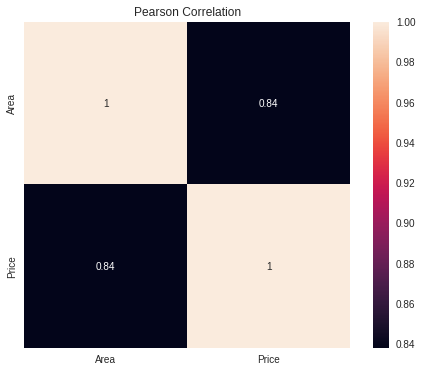

In [ ]:
#heatmap correlation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, square = True)
plt.title("Pearson Correlation")
plt.show()

#✅ Text Processing (Natural Language Processing)

In [ ]:
#selection data
text = df[['Tweet']]
text.head()

,Tweet
0,“8 out of 10 starters experience the current #...
1,🏠 Free sector rents on the rise again! ⬆️ The ...
2,Attention starters! 🏠 Will you help us map the...
3,The average m2 price of #rental homes in the #...
4,This month in @Vastgoedactueel: why it is impo...


##🆎 Removal Punctuation

In [ ]:
#defining to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

text['Tweet_Punctuation'] = text['Tweet'].apply(lambda text: remove_punctuation(text))
text.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Tweet,Tweet_Punctuation
0,“8 out of 10 starters experience the current #...,“8 out of 10 starters experience the current h...
1,🏠 Free sector rents on the rise again! ⬆️ The ...,🏠 Free sector rents on the rise again ⬆️ The a...
2,Attention starters! 🏠 Will you help us map the...,Attention starters 🏠 Will you help us map the ...
3,The average m2 price of #rental homes in the #...,The average m2 price of rental homes in the fr...
4,This month in @Vastgoedactueel: why it is impo...,This month in Vastgoedactueel why it is import...


##🆎 Removal Emoji

In [ ]:
#defining the function to remove emoji
def remove_emoji(string):
    emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F" u"\U0001F300-\U0001F5FF" u"\U0001F680-\U0001F6FF" u"\U0001F1E0-\U0001F1FF" u"\U00002702-\U000027B0" u"\U000024C2-\U0001F251""]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', string)

#applying the function
text['No_Emoji'] = text['Tweet_Punctuation'].apply(lambda x: remove_emoji(x))
text.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Tweet,Tweet_Punctuation,No_Emoji
0,“8 out of 10 starters experience the current #...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...
1,🏠 Free sector rents on the rise again! ⬆️ The ...,🏠 Free sector rents on the rise again ⬆️ The a...,Free sector rents on the rise again The aver...
2,Attention starters! 🏠 Will you help us map the...,Attention starters 🏠 Will you help us map the ...,Attention starters Will you help us map the p...
3,The average m2 price of #rental homes in the #...,The average m2 price of rental homes in the fr...,The average m2 price of rental homes in the fr...
4,This month in @Vastgoedactueel: why it is impo...,This month in Vastgoedactueel why it is import...,This month in Vastgoedactueel why it is import...


##🆎 Removal HTML Attribute

In [ ]:
#defining the function to remove html attribute
def remove_html(text):
    html_pattern = re.compile(r'https?://\S+|www\.\S+')
    return html_pattern.sub(r'', text)

#applying function to the column
text['Tweet_Clean'] = text['No_Emoji'].apply(lambda x: remove_html(x))
text.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Tweet,Tweet_Punctuation,No_Emoji,Tweet_Clean
0,“8 out of 10 starters experience the current #...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...
1,🏠 Free sector rents on the rise again! ⬆️ The ...,🏠 Free sector rents on the rise again ⬆️ The a...,Free sector rents on the rise again The aver...,Free sector rents on the rise again The aver...
2,Attention starters! 🏠 Will you help us map the...,Attention starters 🏠 Will you help us map the ...,Attention starters Will you help us map the p...,Attention starters Will you help us map the p...
3,The average m2 price of #rental homes in the #...,The average m2 price of rental homes in the fr...,The average m2 price of rental homes in the fr...,The average m2 price of rental homes in the fr...
4,This month in @Vastgoedactueel: why it is impo...,This month in Vastgoedactueel why it is import...,This month in Vastgoedactueel why it is import...,This month in Vastgoedactueel why it is import...


##🆎 Lower Casing

In [ ]:
#setting lower case
text['Tweet_Lower'] = text['Tweet_Clean'].str.lower()
text.head()

,Tweet,Tweet_Punctuation,No_Emoji,Tweet_Clean,Tweet_Lower
0,“8 out of 10 starters experience the current #...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...
1,🏠 Free sector rents on the rise again! ⬆️ The ...,🏠 Free sector rents on the rise again ⬆️ The a...,Free sector rents on the rise again The aver...,Free sector rents on the rise again The aver...,free sector rents on the rise again the aver...
2,Attention starters! 🏠 Will you help us map the...,Attention starters 🏠 Will you help us map the ...,Attention starters Will you help us map the p...,Attention starters Will you help us map the p...,attention starters will you help us map the p...
3,The average m2 price of #rental homes in the #...,The average m2 price of rental homes in the fr...,The average m2 price of rental homes in the fr...,The average m2 price of rental homes in the fr...,the average m2 price of rental homes in the fr...
4,This month in @Vastgoedactueel: why it is impo...,This month in Vastgoedactueel why it is import...,This month in Vastgoedactueel why it is import...,This month in Vastgoedactueel why it is import...,this month in vastgoedactueel why it is import...


##🆎 Tokenization

In [ ]:
#defining function for tokenization
def tokenization(text):
    tokens = re.split('W+', text)
    return tokens

#applying function to the column
text['Tweet_Tokenied'] = text['Tweet_Lower'].apply(lambda x: tokenization(x))
text.head()

,Tweet,Tweet_Punctuation,No_Emoji,Tweet_Clean,Tweet_Lower,Tweet_Tokenied
0,“8 out of 10 starters experience the current #...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...,[“8 out of 10 starters experience the current ...
1,🏠 Free sector rents on the rise again! ⬆️ The ...,🏠 Free sector rents on the rise again ⬆️ The a...,Free sector rents on the rise again The aver...,Free sector rents on the rise again The aver...,free sector rents on the rise again the aver...,[ free sector rents on the rise again the ave...
2,Attention starters! 🏠 Will you help us map the...,Attention starters 🏠 Will you help us map the ...,Attention starters Will you help us map the p...,Attention starters Will you help us map the p...,attention starters will you help us map the p...,[attention starters will you help us map the ...
3,The average m2 price of #rental homes in the #...,The average m2 price of rental homes in the fr...,The average m2 price of rental homes in the fr...,The average m2 price of rental homes in the fr...,the average m2 price of rental homes in the fr...,[the average m2 price of rental homes in the f...
4,This month in @Vastgoedactueel: why it is impo...,This month in Vastgoedactueel why it is import...,This month in Vastgoedactueel why it is import...,This month in Vastgoedactueel why it is import...,this month in vastgoedactueel why it is import...,[this month in vastgoedactueel why it is impor...


##🆎 Removal Stopwords

In [ ]:
#stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
text['No_Stopwords'] = text['Tweet_Tokenied'].apply(lambda x:remove_stopwords(x))
text.head()

,Tweet,Tweet_Punctuation,No_Emoji,Tweet_Clean,Tweet_Lower,Tweet_Tokenied,No_Stopwords
0,“8 out of 10 starters experience the current #...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...,[“8 out of 10 starters experience the current ...,[“8 out of 10 starters experience the current ...
1,🏠 Free sector rents on the rise again! ⬆️ The ...,🏠 Free sector rents on the rise again ⬆️ The a...,Free sector rents on the rise again The aver...,Free sector rents on the rise again The aver...,free sector rents on the rise again the aver...,[ free sector rents on the rise again the ave...,[ free sector rents on the rise again the ave...
2,Attention starters! 🏠 Will you help us map the...,Attention starters 🏠 Will you help us map the ...,Attention starters Will you help us map the p...,Attention starters Will you help us map the p...,attention starters will you help us map the p...,[attention starters will you help us map the ...,[attention starters will you help us map the ...
3,The average m2 price of #rental homes in the #...,The average m2 price of rental homes in the fr...,The average m2 price of rental homes in the fr...,The average m2 price of rental homes in the fr...,the average m2 price of rental homes in the fr...,[the average m2 price of rental homes in the f...,[the average m2 price of rental homes in the f...
4,This month in @Vastgoedactueel: why it is impo...,This month in Vastgoedactueel why it is import...,This month in Vastgoedactueel why it is import...,This month in Vastgoedactueel why it is import...,this month in vastgoedactueel why it is import...,[this month in vastgoedactueel why it is impor...,[this month in vastgoedactueel why it is impor...


##🆎 Stemming

In [ ]:
#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

#applying the function
text['Tweet_Stemmed'] = text['No_Stopwords'].apply(lambda x: stemming(x))
text.head()

,Tweet,Tweet_Punctuation,No_Emoji,Tweet_Clean,Tweet_Lower,Tweet_Tokenied,No_Stopwords,Tweet_Stemmed
0,“8 out of 10 starters experience the current #...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...,[“8 out of 10 starters experience the current ...,[“8 out of 10 starters experience the current ...,[“8 out of 10 starters experience the current ...
1,🏠 Free sector rents on the rise again! ⬆️ The ...,🏠 Free sector rents on the rise again ⬆️ The a...,Free sector rents on the rise again The aver...,Free sector rents on the rise again The aver...,free sector rents on the rise again the aver...,[ free sector rents on the rise again the ave...,[ free sector rents on the rise again the ave...,[ free sector rents on the rise again the ave...
2,Attention starters! 🏠 Will you help us map the...,Attention starters 🏠 Will you help us map the ...,Attention starters Will you help us map the p...,Attention starters Will you help us map the p...,attention starters will you help us map the p...,[attention starters will you help us map the ...,[attention starters will you help us map the ...,[attention starters will you help us map the ...
3,The average m2 price of #rental homes in the #...,The average m2 price of rental homes in the fr...,The average m2 price of rental homes in the fr...,The average m2 price of rental homes in the fr...,the average m2 price of rental homes in the fr...,[the average m2 price of rental homes in the f...,[the average m2 price of rental homes in the f...,[the average m2 price of rental homes in the f...
4,This month in @Vastgoedactueel: why it is impo...,This month in Vastgoedactueel why it is import...,This month in Vastgoedactueel why it is import...,This month in Vastgoedactueel why it is import...,this month in vastgoedactueel why it is import...,[this month in vastgoedactueel why it is impor...,[this month in vastgoedactueel why it is impor...,[this month in vastgoedactueel why it is impor...


##🆎 Lemmatization

In [ ]:
#defining the object for lemmatizing
lemmatizer = WordNetLemmatizer()

#defining a function for lemmatizing
def lemmatize_words(text):
    lemma_text = [lemmatizer.lemmatize(word) for word in text]
    return lemma_text
                
#applying the function
text['Tweet_lemmatized'] = text['Tweet_Stemmed'].apply(lambda text: lemmatize_words(text))
text.head()

,Tweet,Tweet_Punctuation,No_Emoji,Tweet_Clean,Tweet_Lower,Tweet_Tokenied,No_Stopwords,Tweet_Stemmed,Tweet_lemmatized
0,“8 out of 10 starters experience the current #...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...,“8 out of 10 starters experience the current h...,[“8 out of 10 starters experience the current ...,[“8 out of 10 starters experience the current ...,[“8 out of 10 starters experience the current ...,[“8 out of 10 starters experience the current ...
1,🏠 Free sector rents on the rise again! ⬆️ The ...,🏠 Free sector rents on the rise again ⬆️ The a...,Free sector rents on the rise again The aver...,Free sector rents on the rise again The aver...,free sector rents on the rise again the aver...,[ free sector rents on the rise again the ave...,[ free sector rents on the rise again the ave...,[ free sector rents on the rise again the ave...,[ free sector rents on the rise again the ave...
2,Attention starters! 🏠 Will you help us map the...,Attention starters 🏠 Will you help us map the ...,Attention starters Will you help us map the p...,Attention starters Will you help us map the p...,attention starters will you help us map the p...,[attention starters will you help us map the ...,[attention starters will you help us map the ...,[attention starters will you help us map the ...,[attention starters will you help us map the ...
3,The average m2 price of #rental homes in the #...,The average m2 price of rental homes in the fr...,The average m2 price of rental homes in the fr...,The average m2 price of rental homes in the fr...,the average m2 price of rental homes in the fr...,[the average m2 price of rental homes in the f...,[the average m2 price of rental homes in the f...,[the average m2 price of rental homes in the f...,[the average m2 price of rental homes in the f...
4,This month in @Vastgoedactueel: why it is impo...,This month in Vastgoedactueel why it is import...,This month in Vastgoedactueel why it is import...,This month in Vastgoedactueel why it is import...,this month in vastgoedactueel why it is import...,[this month in vastgoedactueel why it is impor...,[this month in vastgoedactueel why it is impor...,[this month in vastgoedactueel why it is impor...,[this month in vastgoedactueel why it is impor...


#✅ Sentiment Analysis

In [ ]:
#selection data
df_new = text[['Tweet_Clean']]
df_new.head()

,Tweet_Clean
0,“8 out of 10 starters experience the current h...
1,Free sector rents on the rise again The aver...
2,Attention starters Will you help us map the p...
3,The average m2 price of rental homes in the fr...
4,This month in Vastgoedactueel why it is import...


In [ ]:
#create function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#apply function to data 
df_new['Subjectivity'] = df_new['Tweet_Clean'].apply(getSubjectivity)
df_new['Polarity'] = df_new['Tweet_Clean'].apply(getPolarity)
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Tweet_Clean,Subjectivity,Polarity
0,“8 out of 10 starters experience the current h...,0.40,0.000
1,Free sector rents on the rise again The aver...,0.60,0.125
2,Attention starters Will you help us map the p...,0.00,0.000
3,The average m2 price of rental homes in the fr...,0.60,0.125
4,This month in Vastgoedactueel why it is import...,0.65,0.250


In [ ]:
#create function to get sentiment data
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

#apply function to data
df_new['Sentiment'] = df_new['Polarity'].apply(getSentiment)
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Tweet_Clean,Subjectivity,Polarity,Sentiment
0,“8 out of 10 starters experience the current h...,0.40,0.000,Neutral
1,Free sector rents on the rise again The aver...,0.60,0.125,Positive
2,Attention starters Will you help us map the p...,0.00,0.000,Neutral
3,The average m2 price of rental homes in the fr...,0.60,0.125,Positive
4,This month in Vastgoedactueel why it is import...,0.65,0.250,Positive


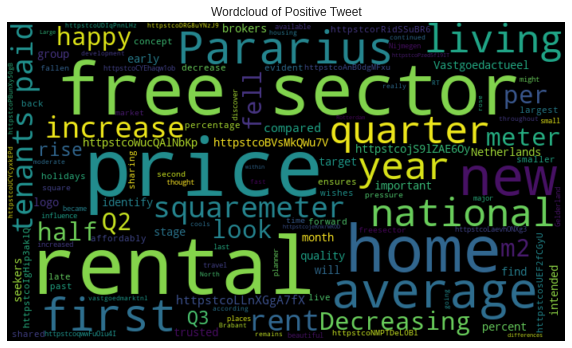

In [ ]:
#visualize positive of tweet sentiment
positive = " ".join(df_new[df_new.Sentiment == 'Positive']['Tweet_Clean'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100).generate(positive)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Positive Tweet")
plt.axis('off')
plt.show()

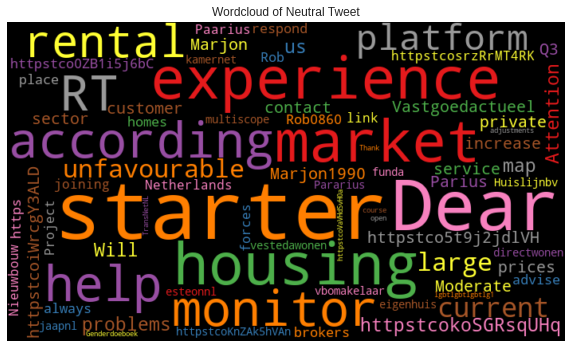

In [ ]:
#visualize neutral of tweet sentiment
neutral = " ".join(df_new[df_new.Sentiment == 'Neutral']['Tweet_Clean'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, colormap = 'Set1').generate(neutral)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Neutral Tweet")
plt.axis('off')
plt.show()

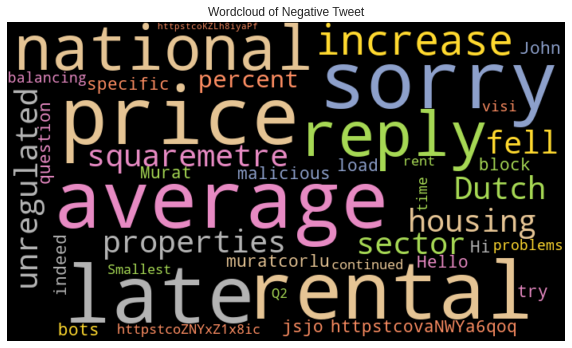

In [ ]:
#visualize negative of tweet sentiment
negative = " ".join(df_new[df_new.Sentiment == 'Negative']['Tweet_Clean'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, colormap = 'Set2').generate(negative)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Negative Tweet")
plt.axis('off')
plt.show()

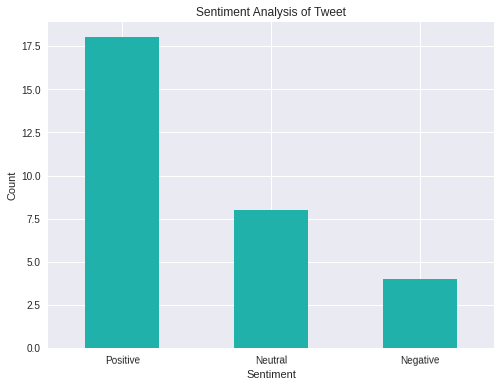

In [ ]:
#visualize sentiment
plt.figure(figsize = (8,6))
plt.xlabel('Sentiment')
plt.ylabel('Count')
chart = df_new['Sentiment'].value_counts().plot(kind = 'bar', color = 'lightseagreen')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 1)
plt.title("Sentiment Analysis of Tweet")
plt.show()

#✅ Random Forest Model

In [ ]:
#selection data
join = (df['Name'], df['Location'], text['Tweet_Clean'], df['Area'], df['Price'], df_new['Sentiment'])
df1 = pd.concat(join, axis = True)
df1.head()

,Name,Location,Tweet_Clean,Area,Price,Sentiment
0,Room Juliana van Stolberglaan,2595 CB Den Haag (Bezuidenhout-Mid...,“8 out of 10 starters experience the current h...,35,825,Neutral
1,Apartment Beeklaan 17,2562 AA Den Haag (Rond de Energiec...,Free sector rents on the rise again The aver...,79,1150,Positive
2,Apartment Frederik Hendriklaan 207 2,2582 CB Den Haag (Statenkwartier) ...,Attention starters Will you help us map the p...,110,1750,Neutral
3,Apartment Paul Gabriëlstraat 110,2596 VH Den Haag (Van Hoytemastraa...,The average m2 price of rental homes in the fr...,130,2500,Positive
4,Apartment Groningsestraat,2587 RJ Den Haag (Belgisch Park) ...,This month in Vastgoedactueel why it is import...,40,1170,Positive


In [ ]:
#transform data to categorical variable
df1['Name'] = df1['Name'].astype('category').cat.codes
df1['Location'] = df1['Location'].astype('category').cat.codes
df1['Tweet_Clean'] = df1['Tweet_Clean'].astype('category').cat.codes
print(df1.dtypes)

Name             int8
Location         int8
Tweet_Clean      int8
Area            int64
Price           int64
Sentiment      object
dtype: object


In [ ]:
#feature scaling
le = LabelEncoder()
le.fit_transform(df1['Sentiment'])

array([1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1,
       2, 2, 1, 1, 1, 2, 0, 1])

In [ ]:
#split data
X = df1.drop('Sentiment', axis = 1)
y = df1['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21, 5)
(21,)
(9, 5)
(9,)


In [ ]:
#build model
rf = RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)
%time rf.fit(X_train, y_train)
accuracy = rf.score(X_test, y_test)
print('Accuracy Score : ', int(accuracy * 100), '%')

CPU times: user 134 ms, sys: 1.71 ms, total: 136 ms
Wall time: 137 ms
Accuracy Score :  77 %


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
#prediction
y_pred = rf.predict(X_test)
print(y_pred)

['Neutral' 'Positive' 'Positive' 'Positive' 'Neutral' 'Positive'
 'Positive' 'Positive' 'Positive']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[[0 0 1]
 [0 2 1]
 [0 0 5]]


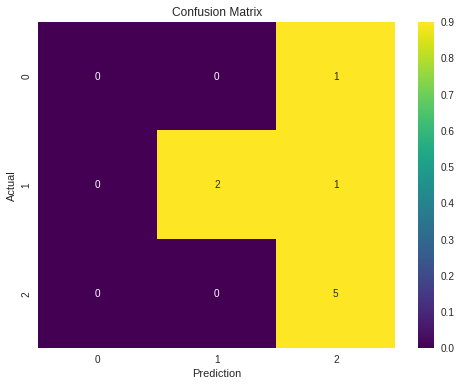

In [ ]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, vmax = 0.9, annot = True, cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       1.00      0.67      0.80         3
    Positive       0.71      1.00      0.83         5

    accuracy                           0.78         9
   macro avg       0.57      0.56      0.54         9
weighted avg       0.73      0.78      0.73         9



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#✅ Check Feature Importance

In [ ]:
#defining feature
feature = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

Name           0.273261
Tweet_Clean    0.271048
Area           0.183507
Location       0.154643
Price          0.117541
dtype: float64


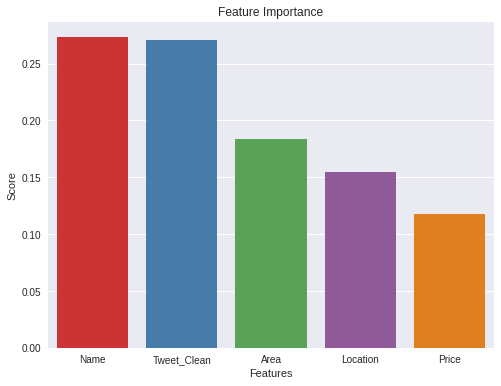

In [ ]:
#visualize feature
plt.figure(figsize = (8,6))
sns.barplot(x = feature.index, y = feature, palette = 'Set1')
plt.title("Feature Importance")
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

#✅ Linear Regression Model

In [ ]:
#selection data
df2 = df[['Name', 'Location', 'Area', 'Price']]
df2.head()

,Name,Location,Area,Price
0,Room Juliana van Stolberglaan,2595 CB Den Haag (Bezuidenhout-Mid...,35,825
1,Apartment Beeklaan 17,2562 AA Den Haag (Rond de Energiec...,79,1150
2,Apartment Frederik Hendriklaan 207 2,2582 CB Den Haag (Statenkwartier) ...,110,1750
3,Apartment Paul Gabriëlstraat 110,2596 VH Den Haag (Van Hoytemastraa...,130,2500
4,Apartment Groningsestraat,2587 RJ Den Haag (Belgisch Park) ...,40,1170


In [ ]:
#handling categorical data
df2 = pd.get_dummies(df2, drop_first = True)
df2.head()

,Area,Price,Name_Apartment Beeklaan 17,Name_Apartment Benoordenhoutseweg 223,Name_Apartment Bezuidenhoutseweg 65 28,Name_Apartment Bosschestraat 13,Name_Apartment Fahrenheitstraat 259,Name_Apartment Frederik Hendriklaan 207 2,Name_Apartment Frederik Hendriklaan 207 I,Name_Apartment Gevers Deynootweg,Name_Apartment Groningsestraat,Name_Apartment Haagsestraat,Name_Apartment Juliana van Stolberglaan,Name_Apartment Laan Copes van Cattenburch,Name_Apartment Palaceplein,Name_Apartment Paul Gabriëlstraat 110,Name_Apartment Scheldeplein,Name_Apartment Stadhoudersplantsoen,Name_Apartment Surinamestraat,Name_Apartment Van Beverningkstraat,Name_Apartment Van den Berghstraat 69,Name_Apartment Vierloper,Name_Apartment Westeinde 197 D,Name_Apartment Westeinde 199 D,Name_House Apendans,Name_House Ellertsveldlaan 99,Name_House Harderwijkstraat 347,Name_Room Juliana van Stolberglaan,Location_ 2512 GZ Den Haag (Kortenbos),Location_ 2515 TH Den Haag (Rivierenbuurt-Noord),Location_ 2517 JL Den Haag (Zorgvliet),Location_ 2518 AE Den Haag (Zeeheldenkwartier),Location_ 2522 ZN Den Haag (Laakkwartier-Oost),Location_ 2548 ND Den Haag (Hoge Veld),Location_ 2561 DV Den Haag (Valkenboskwartier),Location_ 2562 AA Den Haag (Rond de Energiecentrale),Location_ 2573 ZK Den Haag (Oostbroek-Zuid),Location_ 2582 CB Den Haag (Statenkwartier),Location_ 2582 VG Den Haag (Statenkwartier),Location_ 2585 EX Den Haag (Archipelbuurt),Location_ 2585 GG Den Haag (Archipelbuurt),Location_ 2586 BS Den Haag (Scheveningen Badplaats),Location_ 2586 KT Den Haag (Scheveningen Badplaats),Location_ 2587 HA Den Haag (Belgisch Park),Location_ 2587 RJ Den Haag (Belgisch Park),Location_ 2587 TH Den Haag (Belgisch Park),Location_ 2587 WE Den Haag (Belgisch Park),Location_ 2594 AC Den Haag (Bezuidenhout-West),Location_ 2595 CB Den Haag (Bezuidenhout-Midden),Location_ 2595 CR Den Haag (Bezuidenhout-Oost),Location_ 2596 BE Den Haag (Van Hoytemastraat en omgeving),Location_ 2596 VH Den Haag (Van Hoytemastraat en omgeving)
0,35,825,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,79,1150,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,110,1750,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,130,2500,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,40,1170,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
#split data
X = df2.drop('Price', axis = 1)
y = df2['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 51)
(9, 51)
(21,)
(9,)


In [ ]:
#build model 
lr = LinearRegression()
%time lr.fit(X_train, y_train)

CPU times: user 4.74 ms, sys: 972 µs, total: 5.71 ms
Wall time: 29.5 ms


LinearRegression()

In [ ]:
#prediction
y_pred = lr.predict(X_test)
print(y_pred)

[ 932.38636364 1252.27272727 1614.77272727 1125.         1089.77272727
 1864.77272727 1802.27272727 1162.5        1642.38636364]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


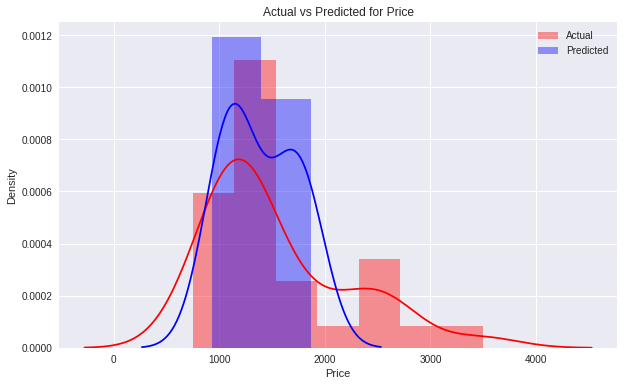

In [ ]:
#visualize actual & prediction
plt.figure(figsize = (10, 6))
ax = sns.distplot(y, hist = True, color = "r", label = "Actual")
sns.distplot(y_pred, hist = True, color = "b", label = "Predicted" , ax = ax)
plt.title('Actual vs Predicted for Price')
plt.legend()
plt.show()

In [ ]:
#check MAE, MSE, R-Squared & RMSE
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred).round(2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred).round(2))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred).round(2)))
print('R-Squared : ', metrics.r2_score(y_test, y_pred, multioutput = 'variance_weighted'))

Mean Absolute Error :  471.92
Mean Squared Error :  311265.62
Root Mean Squared Error :  21.723719755143225
R-Squared :  -1.8288620183783983


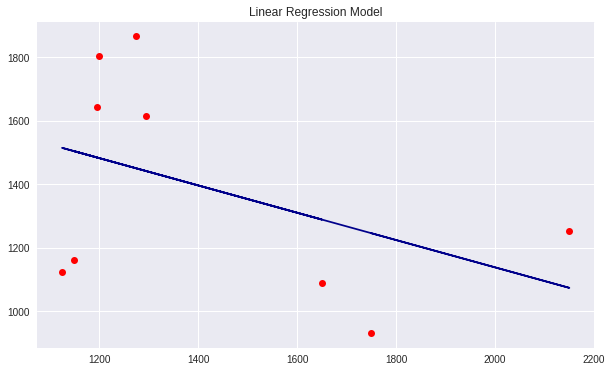

In [ ]:
#visualize model
x = y_test
y = y_pred

plt.figure(figsize = (10,6))
plt.title("Linear Regression Model")
plt.plot(x, y, 'o', color = 'r')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


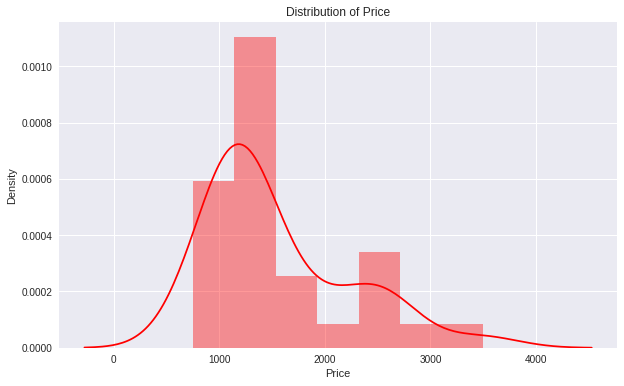

In [ ]:
#distribution
plt.figure(figsize = (10,6))
sns.distplot(df['Price'], color = 'r')
plt.title("Distribution of Price")
plt.show()

#✅ Check Feature Importance

In [ ]:
#defining feature
coef = pd.Series(lr.coef_, index = X.columns)

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

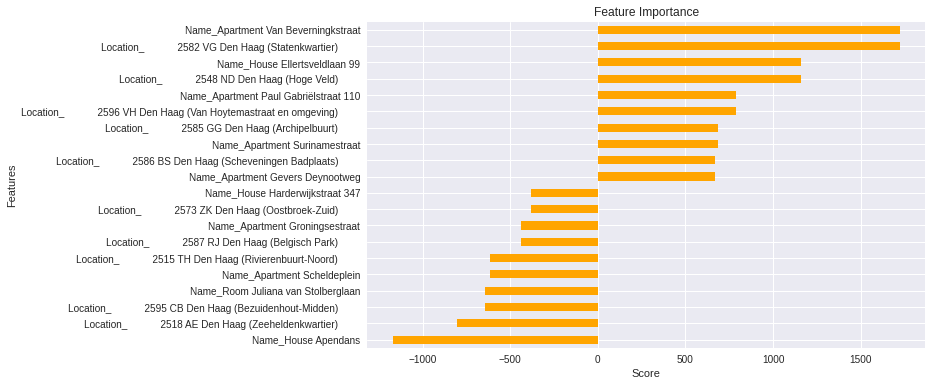

In [ ]:
#visualize feature
plt.figure(figsize = (10,6))
imp_coef.plot(kind = 'barh', color = 'orange')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()